# COMP5318 - Machine Learning and Data Mining 

## Tutorial 7 - Multinomial Logistic Regression

**Semester 2, 2019**

**Objectives:**

* To learn about using Gradient Decent
* To learn about building a Logistic Regression model for multiple classes from Scratch

**Instructions:**
* Exercises to be completed on IPython notebook such as: 
   * Ipython 3 (Jupyter) notebook installed on your computer http://jupyter.org/install (you need to have Python installed first https://docs.python.org/3/using/index.html )
   * Web-based Ipython notebooks such as Google Colaboratory https://colab.research.google.com/ 
   
* If you are using Jupyter intalled on your computer, Go to File->Open. Drag and drop "lab7.ipynb" file to the home interface and click upload. 
* If you are using Google Colaboratory, Click File->Upload notebook, and and upload "lab7.ipynb" file
* Complete exercises in "lab7.ipynb".
* To run the cell you can press Ctrl-Enter or hit the Play button at the top.
* Complete all exercises marked with **TODO**.
* Save your file when you are done with the exercises, so you can show your tutor next week.


Lecturers: Nguyen Hoang Tran

Tutors: Fengxiang He, Shaojun Zhang, Fangzhou Shi, Yang Lin, Iwan Budiman, Zhiyi Wang, Canh Dinh, Yixuan Zhang, Rui Dong, Haoyu He, Dai Hoang Tran, Peibo Duan

## 1. Multi-Class Logistic Regression 

### 1.1 Softmax function

Definition of Softmax function:
Input: $\textbf{x} \in \textbf{R}^{D}$

Assume that there are $K$ different classes ${C_1,C_2 ..., C_k}$. For each class $C_k$, we have parameter vector $\textbf{w}_k$ and model the posterior probability as:
$$
h_\textbf{w}(\textbf{x}) = p(y = C_k|\textbf{x};\textbf{w}) = \frac{\exp(\textbf{w}_k^T\textbf{x})}{\sum_{k=1}^K \exp(\textbf{w}_k^T\textbf{x})} 
%- y_j = \mathrm{softmax}(\mathbf{o})_j - y_j = \Pr(c = 1|x) - y_j
$$
Decision boundary: Assign $\textbf{x}$ with the label that is the maximum of posterior:
$$
argmax_k P(C_k|\textbf{x};\textbf{w}) \rightarrow argmax_k \textbf{w}_k^T\textbf{x}
$$

The formula of multinomial logistics loss is:
$$
\textbf{J}(\textbf{w}) = - \left[\sum_{n=1}^{N} \sum_{k=1}^K 1_{\{y^{n} = C_k\}}log(h_\textbf{w}(\textbf{x}^n))\right] = - \left[\sum_{n=1}^{N} \sum_{k=1}^K 1_{\{y^{n} = C_k\}}log(y^{n} =C_k| \textbf{x}^{n};\textbf{w})\right]
$$
With $N$ is total number of sample

**When K = 2, Multinomial model reduce to binary logistic regression**

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

**Exercise 1.1:** Define Softmax function. 

In [2]:
def softmax(Z): # TODO
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 1, keepdims = True)
    return A

### 1.2 Gradient Descent for logistic regression
With $\eta $ is step size we have the gradient update:
$$
w_{t+1} \leftarrow w_{t} - \eta \frac{1}{N}\nabla  \textbf{J}(\textbf{w})
$$

$$
w_{t+1} \leftarrow w_{t} - \eta \left(\frac{1}{N}\sum_{n=1}^N(h_w(x^{n}) - y^{n})x^{n}\right)
$$

Adding regularization term :
$$w_{t+1} \leftarrow w_{t} - \eta \left(\frac{1}{N}\sum_{n=1}^N(h_w(x^{n}) - y^{n})x^{n} +\lambda w_t \right)$$ 

In [3]:
# calculate gradient 
def softmax_grad(X, y, W):
    A = softmax(X.dot(W))    # shape of (N, C)
    id0 = range(X.shape[0])  # number of train data
    A[id0, y] -= 1           # A - Y, shape of (N, C)
    return X.T.dot(A)/X.shape[0]
    '''
    onehot = np.zeros((len(y), C ))
    onehot[np.arange(len(y)), y] = 1
    A = softmax_stable(x.dot(W))
    A = A - onehot
    x.T.dot(A2)/x.shape[0]
    '''

Define learning function for multi-logistic regression

In [4]:
# cost or loss function  
def softmax_loss(X, y, W):
    A = softmax(X.dot(W))
    id0 = range(X.shape[0])
    return -np.mean(np.log(A[id0, y]))

**Exercise 1.2:** Calculate W after each update

In [5]:
# building learning function using softmax gradient descent
def softmax_fit(X, y, W, lr = 0.01, nepoches = 100, tol = 1e-5, batch_size = 10):
    W_old = W.copy()
    ep = 0 
    loss_hist = [softmax_loss(X, y, W)] # store history of loss 
    N = X.shape[0]
    nbatches = int(np.ceil(float(N)/batch_size))
    while ep < nepoches: 
        ep += 1 
        mix_ids = np.random.permutation(N) # mix data 
        for i in range(nbatches):
            # get the i-th batch
            batch_ids = mix_ids[batch_size*i:min(batch_size*(i+1), N)] 
            X_batch, y_batch = X[batch_ids], y[batch_ids]
            W -= lr*softmax_grad(X_batch, y_batch, W) # update gradient descent # TODO
        loss_hist.append(softmax_loss(X, y, W))
        if np.linalg.norm(W - W_old)/W.size < tol:
            break 
        W_old = W.copy()
    return W, loss_hist 

# predict function
def pred(W, X):
    A = softmax(X.dot(W))
    return np.argmax(A, axis = 1)

## 2. Applying the algorithm with dataset

### 2.1 Generate dataset with 5 different classes

In [6]:
C = 5    # number of classes
N = 800  # number of points per class 
means = [[2, 2], [8, 3], [3, 6], [14, 2], [12, 8]]
cov = [[1, 0], [0, 1]]

X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X3 = np.random.multivariate_normal(means[3], cov, N)
X4 = np.random.multivariate_normal(means[4], cov, N)

X = np.concatenate((X0, X1, X2, X3, X4), axis = 0) # each row is a datapoint
Xbar = np.concatenate((X, np.ones((X.shape[0], 1))), axis = 1) # bias trick 
y = np.asarray([0]*N + [1]*N + [2]*N+ [3]*N + [4]*N)

Display dataset

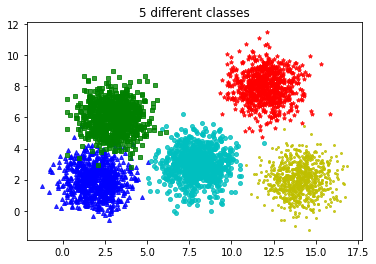

In [7]:
def display(X, label):
    X0 = X[np.where(label == 0)[0]]
    X1 = X[np.where(label == 1)[0]]
    X2 = X[np.where(label == 2)[0]]
    X3 = X[np.where(label == 3)[0]]
    X4 = X[np.where(label == 4)[0]]
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'co', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'gs', markersize = 4, alpha = .8)
    plt.plot(X3[:, 0], X3[:, 1], 'y.', markersize = 4, alpha = .8)
    plt.plot(X4[:, 0], X4[:, 1], 'r*', markersize = 4, alpha = .8)
    plt.plot()
    
display(X,y)
plt.title("5 different classes")
plt.show()

### 2.2 Separate the dataset into training set and test set to train Multi-logistic model 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xbar, y, test_size=0.33, random_state=42)

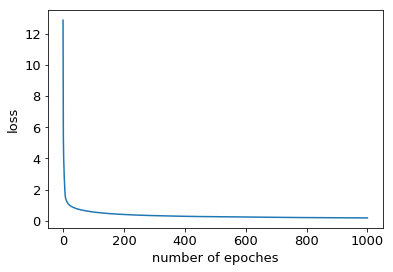

In [11]:
W_init = np.random.randn(X_train.shape[1], C)
W, loss_hist = softmax_fit(X_train, y_train, W_init, batch_size = 1000, nepoches = 1000, lr = 0.05)
    
plt.plot(loss_hist)
plt.xlabel('number of epoches', fontsize = 13)
plt.ylabel('loss', fontsize = 13)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.show() 

### 2.2 Test accuracy on test set

**Exercise 1.3:** Define the function to calculate the accuracy of the model

In [10]:
def accuracy(y_pre,y): # TODO
    count = y_pre == y
    accuracy = count.sum()/len(count)
    return accuracy

In [11]:
y_pre = pred(W,X_test)
print("Accuracy of model on test set:",accuracy(y_pre,y_test))

Accuracy of model on test set: 0.9871212121212121


### 2.3 Training model on all dataset

In [12]:
W2, loss_hist2 = softmax_fit(Xbar, y, W_init, batch_size = 10, nepoches = 100, lr = 0.05)

Show the final pattern for each class

In [13]:
xm = np.arange(-2, 18, 0.025)
xlen = len(xm)
ym = np.arange(-3, 11, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)
xx1 = xx.ravel().reshape(-1, 1)
yy1 = yy.ravel().reshape(-1, 1)
XX = np.concatenate(( xx1, yy1, np.ones(( xx.size, 1))), axis = 1)

Z = pred(W2, XX)
Z = Z.reshape(xx.shape)

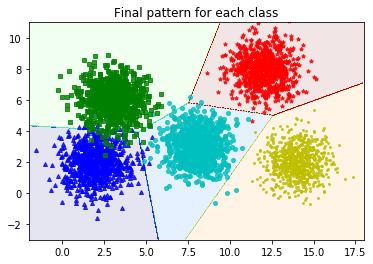

In [14]:
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)
plt.xlim(-2, 18)
plt.ylim(-3, 11)
plt.title("Final pattern for each class")
display(X, y)
plt.show()